In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

SGD

In [14]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(train_images, train_labels, epochs=5, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 17s 35ms/step - loss: 0.8078 - accuracy: 0.7837 - val_loss: 0.3677 - val_accuracy: 0.8860
Epoch 2/5
469/469 [==============================] - 16s 34ms/step - loss: 0.3067 - accuracy: 0.9077 - val_loss: 0.2250 - val_accuracy: 0.9346
Epoch 3/5
469/469 [==============================] - 16s 35ms/step - loss: 0.2200 - accuracy: 0.9342 - val_loss: 0.1761 - val_accuracy: 0.9495
Epoch 4/5
469/469 [==============================] - 17s 37ms/step - loss: 0.1687 - accuracy: 0.9500 - val_loss: 0.1321 - val_accuracy: 0.9596
Epoch 5/5
469/469 [==============================] - 17s 37ms/step - loss: 0.1391 - accuracy: 0.9589 - val_loss: 0.1176 - val_accuracy: 0.9651


ADAM

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=5, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 18s 38ms/step - loss: 0.1139 - accuracy: 0.9656 - val_loss: 0.0557 - val_accuracy: 0.9823
Epoch 2/5
469/469 [==============================] - 17s 35ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0389 - val_accuracy: 0.9870
Epoch 3/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0359 - val_accuracy: 0.9896
Epoch 4/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0272 - val_accuracy: 0.9914
Epoch 5/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0247 - accuracy: 0.9916 - val_loss: 0.0382 - val_accuracy: 0.9883


RMSProp

In [19]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history3 = model.fit(train_images, train_labels, epochs=5, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0380 - val_accuracy: 0.9881
Epoch 2/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0321 - val_accuracy: 0.9897
Epoch 3/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0248 - val_accuracy: 0.9924
Epoch 4/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0319 - val_accuracy: 0.9913
Epoch 5/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0328 - val_accuracy: 0.9913


In [28]:
sgd_training_acc = history1.history['accuracy']
sgd_val_acc = history1.history['val_accuracy']
sgd_loss =history1.history['loss']

adam_training_acc = history2.history['accuracy']
adam_val_acc = history2.history['val_accuracy']
adam_loss =history2.history['loss']

rmsprop_training_acc = history3.history['accuracy']
rmsprop_val_acc = history3.history['val_accuracy']
rmsprop_loss =history3.history['loss']


Text(0.5, 0, 'RMSProp Validation Accuracy')

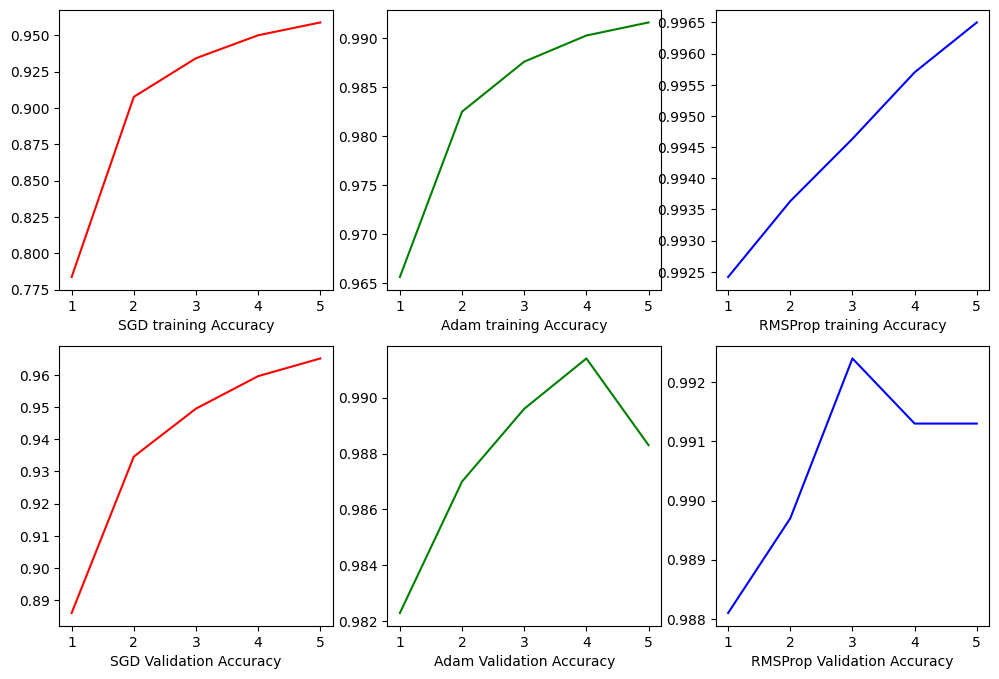

In [41]:
list = [1,2,3,4,5]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axes[0, 0].plot(list, sgd_training_acc, label='SGD training Accuracy', color='r')
axes[0, 0].set_xlabel('SGD training Accuracy')
axes[1, 0].plot(list, sgd_val_acc, label='SGD Validation Accuracy', color='r')
axes[1, 0].set_xlabel('SGD Validation Accuracy')


axes[0, 1].plot(list, adam_training_acc, label='Adam training Accuracy', color='g')
axes[0, 1].set_xlabel('Adam training Accuracy')
axes[1, 1].plot(list, adam_val_acc, label='SGD Validation Accuracy', color='g')
axes[1, 1].set_xlabel('Adam Validation Accuracy')


axes[0, 2].plot(list, rmsprop_training_acc, label='RMSProp training Accuracy', color='b')
axes[0, 2].set_xlabel('RMSProp training Accuracy')
axes[1, 2].plot(list, rmsprop_val_acc, label='RMSProp Validation Accuracy', color='b')
axes[1, 2].set_xlabel('RMSProp Validation Accuracy')

Text(0.5, 1.0, 'RmsProp LOSS')

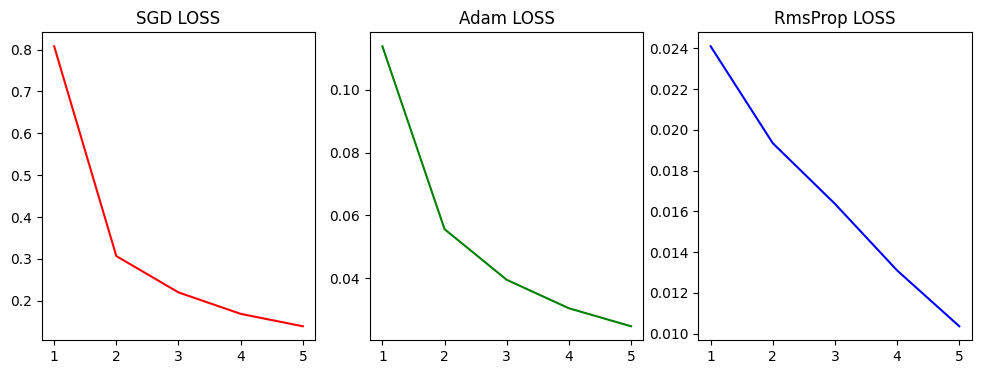

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.plot(list, sgd_loss, color='r')
ax1.set_title('SGD LOSS')

ax2.plot(list, adam_loss , color='g')
ax2.set_title('Adam LOSS')

ax3.plot(list, rmsprop_loss, color='b')
ax3.set_title('RmsProp LOSS')
